# Payal Rathod

## The Sparks Foundation - Data Science & Business Analytics Internship

### TASK 1 - Prediction using supervised Machine Learning 

Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just two variables. What will be predicted score if a student studies for 9.25 hrs/day?

Data can be found at : http://bit.ly/w-data .

##### importing necessary libraries


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data 


In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("Data imported successfully")

stud_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis 

In [5]:
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Check for null values
stud_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

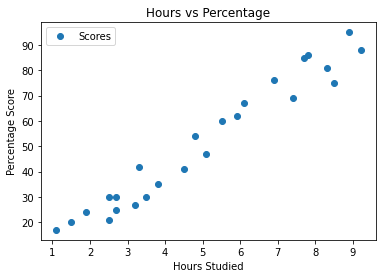

In [8]:
# Plotting the distribution of scores
stud_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [26]:
#extracting features and labels of the dataset ( divide the data into "attributes" (inputs) and "labels" (outputs).)
X = stud_data.iloc[:,:-1].values
y = stud_data.iloc[:,1].values

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

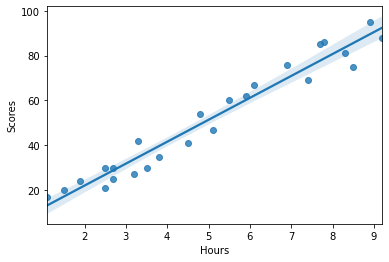

In [27]:
# visalize the model 
sns.regplot(x="Hours", y="Scores", data=stud_data)

In [28]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 0) 

## linear regression model

In [29]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## Prediction

In [30]:
# predict the model
y_pred = regressor.predict(X_test)

In [31]:
print(X_test, y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [32]:
# The result above shows that student scores increase with the studing hours

# Testing the Model

In [33]:
#lets comapre between the actual and predicited scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


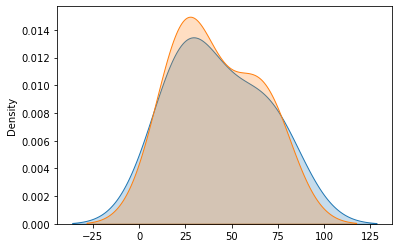

In [34]:
#Actual vs Predicted distribution plot
sns.kdeplot(y_pred,label="Predicted", shade=True);

sns.kdeplot(data=y_test,label="Actual", shade=True);

In [35]:
#here we will predict the score for specific studying hours.

study_hours = 9.25
sc_pred = regressor.predict([[study_hours]])
print("No of Hours = {}". format(study_hours))
print("Predicted Score = {}". format(sc_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluate the model 

In [36]:
#import library to check accuracy
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, y_pred)
print(score)

4.183859899002975


In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9454906892105356


The normal case is when the R2 score is between zero and one. 0.95 means our model is capable to explain 95 per cent of the variance of data.

In [39]:
print('the train data accuracy =',regressor.score(X_train,y_train))
print('the test data accuracy  =',regressor.score(X_test,y_test))

the train data accuracy = 0.9515510725211552
the test data accuracy  = 0.9454906892105356
